In [1]:
%load_ext autoreload
%autoreload 2

from collections import Counter 

from load import load_data
from statistics import present_most_common
from visualize import scatter_plot

import numpy as np
from MulticoreTSNE import MulticoreTSNE as TSNE
from gensim.models import Phrases, Word2Vec

In [2]:
sentence_stream = load_data(1)

100%|██████████| 35683/35683 [00:53<00:00, 665.25it/s]


In [3]:
sentence_stream[0]

['sygn',
 'akt',
 'v',
 'cz',
 'postanowienie',
 'dnia',
 'lutego',
 'r',
 'sąd',
 'najwyższy',
 'w',
 'składzie',
 'ssn',
 'grzegorz',
 'misiurek',
 'przewodniczący',
 'ssn',
 'irena',
 'gromska',
 'szuster',
 'sprawozdawca',
 'ssn',
 'dariusz',
 'zawistowski',
 'w',
 'sprawie',
 'z',
 'powództwa',
 'p',
 'b',
 'spółki',
 'z',
 'o',
 'o',
 'z',
 'siedzibą',
 'w',
 'p',
 'przeciwko',
 'm',
 'ł',
 'o',
 'zapłatę',
 'po',
 'rozpoznaniu',
 'na',
 'posiedzeniu',
 'niejawnym',
 'w',
 'izbie',
 'cywilnej',
 'w',
 'dniu',
 'lutego',
 'r',
 'zażalenia',
 'pozwanego',
 'na',
 'orzeczenie',
 'o',
 'kosztach',
 'zawarte',
 'w',
 'wyroku',
 'sądu',
 'apelacyjnego',
 'z',
 'dnia',
 'lipca',
 'r',
 'zmienia',
 'zaskarżone',
 'orzeczenie',
 'w',
 'ten',
 'sposób',
 'że',
 'podwyższa',
 'zasądzoną',
 'od',
 'strony',
 'powodowej',
 'na',
 'rzecz',
 'pozwanego',
 'tytułem',
 'zwrotu',
 'kosztów',
 'postępowania',
 'apelacyjnego',
 'kwotę',
 'zł',
 'dwa',
 'tysiące',
 'siedemset',
 'do',
 'kwoty',
 'trz

In [4]:
%%time

bigrams = Phrases(sentence_stream)
bigrams.save('bigrams')

trigrams = Phrases(bigrams[sentence_stream])
trigrams.save('trigrams')

/home/m.rapacz/.virtualenvs/nlp/lib/python3.5/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


CPU times: user 11min 37s, sys: 3.72 s, total: 11min 41s
Wall time: 11min 48s


In [5]:
present_most_common(bigrams, dash_count=1)

z_dnia -> 459633
art_k -> 347946
z_art -> 226368
w_dniu -> 207446
k_p -> 203616
art_ust -> 188680
na_podstawie -> 178236
w_tym -> 176831
w_sprawie -> 173631
p_c -> 139656


In [6]:
present_most_common(trigrams, dash_count=2)

k_p_c -> 137402
art_ust_ustawy -> 57664
w_ocenie_sądu -> 43538
w_niniejszej_sprawie -> 41706
art_ust_pkt -> 36595
sądu_najwyższego_z -> 35298
w_kwocie_zł -> 34233
r_sygn_akt -> 33269
sąd_okręgowy_w -> 30497
sądu_rejonowego_w -> 26236


In [7]:
%%time

updated_sentence_stream = [trigrams[sentence] for sentence in sentence_stream]

/home/m.rapacz/.virtualenvs/nlp/lib/python3.5/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [8]:
updated_sentence_stream[0]

['sygn_akt',
 'v_cz',
 'postanowienie',
 'dnia_lutego',
 'r',
 'sąd_najwyższy',
 'w',
 'składzie_ssn',
 'grzegorz_misiurek',
 'przewodniczący_ssn',
 'irena',
 'gromska',
 'szuster_sprawozdawca',
 'ssn_dariusz',
 'zawistowski',
 'w',
 'sprawie',
 'z',
 'powództwa',
 'p',
 'b',
 'spółki',
 'z',
 'o',
 'o',
 'z',
 'siedzibą',
 'w',
 'p',
 'przeciwko',
 'm',
 'ł',
 'o',
 'zapłatę',
 'po_rozpoznaniu',
 'na',
 'posiedzeniu_niejawnym',
 'w',
 'izbie_cywilnej',
 'w',
 'dniu_lutego',
 'r',
 'zażalenia',
 'pozwanego',
 'na',
 'orzeczenie',
 'o',
 'kosztach_zawarte',
 'w',
 'wyroku',
 'sądu_apelacyjnego',
 'z',
 'dnia_lipca',
 'r',
 'zmienia_zaskarżone',
 'orzeczenie',
 'w',
 'ten_sposób',
 'że',
 'podwyższa_zasądzoną',
 'od',
 'strony_powodowej',
 'na',
 'rzecz',
 'pozwanego',
 'tytułem_zwrotu',
 'kosztów_postępowania',
 'apelacyjnego',
 'kwotę_zł',
 'dwa_tysiące',
 'siedemset',
 'do',
 'kwoty',
 'trzy_tysiące',
 'sześćset',
 'zasądza_od',
 'strony_powodowej',
 'na',
 'rzecz',
 'pozwanego',
 'kw

In [9]:
model = Word2Vec(
    sentences=updated_sentence_stream, 
    window=5, 
    size=300,
    workers=8,
    min_count=3
)
model.save('word2vec')

In [10]:
model = Word2Vec.load('word2vec')

In [11]:
word_vectors = model.wv
del model

In [12]:
word_vectors

In [13]:
expressions = [
    "sąd_najwyższy", 
    "trybunał_konstytucyjny", 
    "kodeks_cywilny",
    "kpk", 
    "sąd_rejonowy",
    "szkoda", 
    "wypadek", 
    "kolizja",
    "szkoda_majątkowa", 
    "nieszczęście", 
    "rozwód"
]

In [14]:
for expression in expressions:
    print(expression)
    try:
        similar_expressions = word_vectors.most_similar(expression)
        for similar in similar_expressions:
            print("\t{}".format(similar))
    except KeyError:
        print("\tnot in the vocabulary")

sąd_najwyższy
	('sad_najwyższy', 0.7512943744659424)
	('trybunał_konstytucyjny', 0.7012783288955688)
	('trybunał', 0.6553069353103638)
	('sąd_apelacyjny', 0.645043671131134)
	('nsa', 0.599739670753479)
	('sn', 0.591528058052063)
	('naczelny_sąd', 0.5735213756561279)
	('prokurator_generalny', 0.5733597278594971)
	('tsue', 0.5685586929321289)
	('sądu_najwyższego', 0.5578088164329529)
trybunał_konstytucyjny
	('trybunał', 0.8855277299880981)
	('prokurator_generalny', 0.7600996494293213)
	('marszałek_sejmu', 0.755129337310791)
	('sąd_pytający', 0.7142848968505859)
	('sąd_najwyższy', 0.7012783288955688)
	('pytający_sąd', 0.6898702383041382)
	('sejm', 0.6883182525634766)
	('tk', 0.6527005434036255)
	('rpo', 0.6318508386611938)
	('marszałek', 0.626535177230835)
kodeks_cywilny
	('kodeks_karny', 0.7166805267333984)
	('cywilny_komentarz', 0.6624103784561157)
	('część_ogólna', 0.6468185186386108)
	('kodeks_pracy', 0.6429188251495361)
	('a_kidyba', 0.6427192687988281)
	('e_gniewek', 0.6422030925750

In [15]:
word_vectors.most_similar(positive=['sąd_najwyższy', 'konstytucja'], negative=['kpc'], topn=1)

[('trybunał_konstytucyjny', 0.6424192786216736)]

In [16]:
word_vectors.most_similar(positive=['pasażer', 'kobieta'], negative=['mężczyzna'], topn=1)

[('piesza', 0.6682502627372742)]

In [17]:
word_vectors.most_similar(positive=['samochód', 'rzeka'], negative=['droga'], topn=1)

[('ciągnik', 0.5775692462921143)]

In [28]:
vectors = [
    'szkoda',
    'strata',
    'uszczerbek',
    'szkoda_majątkowa',
#     'uszczerbek_na_zdrowiu',
    'krzywda',
    'niesprawiedliwość',
    'nieszczęście'
]

In [27]:
"uszczerbek_na_zdrowiu" in word_vectors

False

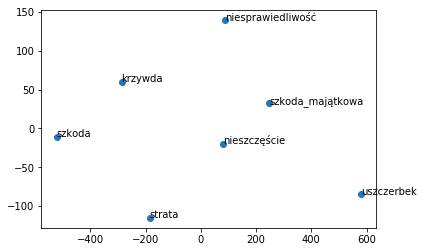

In [22]:
X = np.array([word_vectors[x] for x in vectors])
X_transformed = TSNE(n_components=2, n_jobs=8).fit_transform(X)

scatter_plot(X_transformed, labels=vectors)

In [ ]:
%%time

X_whole = TSNE(n_components=2, n_jobs=8).fit(word_vectors.vectors)
X_transformed_from_all = X_whole.fit_transform(word_vectors[vectors])

scatter_plot(X_transformed_from_all, labels=vectors)